In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd

#Import the database with tagged materials
data = pd.read_csv('/Door_Classes.csv')  
data.dropna()

,Images,modernDoor,oldDoor,flushDoor,panelledDoor,whiteDoor,brownDoor
0,6386.jpg,1.157284e-06,2.139337e-09,2.148708e-11,5.826532e-10,9.999988e-01,1.907876e-08
1,6434.jpg,6.086147e-08,7.399202e-03,1.027092e-12,6.652644e-11,4.010208e-09,9.926007e-01
2,6436.jpg,8.521461e-02,8.015710e-03,6.962844e-10,4.855394e-12,9.067697e-01,5.167211e-08
3,6444.jpg,1.244165e-05,3.337391e-05,5.309081e-13,3.508529e-11,9.999421e-01,1.219170e-05
4,6447.jpg,4.404548e-06,1.090924e-02,2.147019e-09,1.377369e-10,9.890864e-01,5.492319e-09
...,...,...,...,...,...,...,...
1291,PanelledDoor (95).png,1.466330e-11,9.679381e-01,3.066298e-13,3.205207e-02,2.797790e-14,9.919674e-06
1292,PanelledDoor (96).png,1.367958e-06,5.021578e-09,2.303995e-04,1.231167e-03,9.978110e-01,7.260444e-04
1293,PanelledDoor (97).png,1.377118e-09,4.487420e-03,1.590054e-11,9.857154e-01,1.237336e-07,9.796941e-03
1294,PanelledDoor (98).png,4.510782e-10,4.408711e-10,2.185329e-09,1.539752e-04,9.998457e-01,1.939630e-07


In [ ]:
# In order to combine the feautres that are opposite, oldDoor, brownDoor and flushDoor are assinged values from 0 to -1 
data["oldDoor"] = data["oldDoor"].apply(lambda x: x *(-1))
data["brownDoor"] = data["brownDoor"].apply(lambda x: x *(-1))
data["flushDoor"] = data["flushDoor"].apply(lambda x: x *(-1))
data

,Images,modernDoor,oldDoor,flushDoor,panelledDoor,whiteDoor,brownDoor
0,6386.jpg,1.157284e-06,-2.139337e-09,-2.148708e-11,5.826532e-10,9.999988e-01,-1.907876e-08
1,6434.jpg,6.086147e-08,-7.399202e-03,-1.027092e-12,6.652644e-11,4.010208e-09,-9.926007e-01
2,6436.jpg,8.521461e-02,-8.015710e-03,-6.962844e-10,4.855394e-12,9.067697e-01,-5.167211e-08
3,6444.jpg,1.244165e-05,-3.337391e-05,-5.309081e-13,3.508529e-11,9.999421e-01,-1.219170e-05
4,6447.jpg,4.404548e-06,-1.090924e-02,-2.147019e-09,1.377369e-10,9.890864e-01,-5.492319e-09
...,...,...,...,...,...,...,...
1291,PanelledDoor (95).png,1.466330e-11,-9.679381e-01,-3.066298e-13,3.205207e-02,2.797790e-14,-9.919674e-06
1292,PanelledDoor (96).png,1.367958e-06,-5.021578e-09,-2.303995e-04,1.231167e-03,9.978110e-01,-7.260444e-04
1293,PanelledDoor (97).png,1.377118e-09,-4.487420e-03,-1.590054e-11,9.857154e-01,1.237336e-07,-9.796941e-03
1294,PanelledDoor (98).png,4.510782e-10,-4.408711e-10,-2.185329e-09,1.539752e-04,9.998457e-01,-1.939630e-07


In [ ]:
#Combine the opposite features
import math

data["white"]= abs(data["whiteDoor"]) > abs(data["brownDoor"])

data["white"] = data["white"].apply(lambda x: data["whiteDoor"] if x== True else data["brownDoor"])

data["panelled"]= abs(data["panelledDoor"]) > abs(data["flushDoor"])
data["panelled"] = data["panelled"].apply(lambda x: data["panelledDoor"] if x == True else data["flushDoor"])

data["modern"]= abs(data["modernDoor"]) > abs(data["oldDoor"])
data["modern"] = data["modern"].apply(lambda x: data["modernDoor"] if x == True else data["oldDoor"])

data


,Images,modernDoor,oldDoor,flushDoor,panelledDoor,whiteDoor,brownDoor,white,panelled,modern
0,6386.jpg,1.157284e-06,-2.139337e-09,-2.148708e-11,5.826532e-10,9.999988e-01,-1.907876e-08,9.999988e-01,5.826532e-10,1.157284e-06
1,6434.jpg,6.086147e-08,-7.399202e-03,-1.027092e-12,6.652644e-11,4.010208e-09,-9.926007e-01,-1.907876e-08,5.826532e-10,-2.139337e-09
2,6436.jpg,8.521461e-02,-8.015710e-03,-6.962844e-10,4.855394e-12,9.067697e-01,-5.167211e-08,9.999988e-01,-2.148708e-11,1.157284e-06
3,6444.jpg,1.244165e-05,-3.337391e-05,-5.309081e-13,3.508529e-11,9.999421e-01,-1.219170e-05,9.999988e-01,5.826532e-10,-2.139337e-09
4,6447.jpg,4.404548e-06,-1.090924e-02,-2.147019e-09,1.377369e-10,9.890864e-01,-5.492319e-09,9.999988e-01,-2.148708e-11,-2.139337e-09
...,...,...,...,...,...,...,...,...,...,...
1291,PanelledDoor (95).png,1.466330e-11,-9.679381e-01,-3.066298e-13,3.205207e-02,2.797790e-14,-9.919674e-06,-1.907876e-08,5.826532e-10,-2.139337e-09
1292,PanelledDoor (96).png,1.367958e-06,-5.021578e-09,-2.303995e-04,1.231167e-03,9.978110e-01,-7.260444e-04,9.999988e-01,5.826532e-10,1.157284e-06
1293,PanelledDoor (97).png,1.377118e-09,-4.487420e-03,-1.590054e-11,9.857154e-01,1.237336e-07,-9.796941e-03,-1.907876e-08,5.826532e-10,-2.139337e-09
1294,PanelledDoor (98).png,4.510782e-10,-4.408711e-10,-2.185329e-09,1.539752e-04,9.998457e-01,-1.939630e-07,9.999988e-01,5.826532e-10,1.157284e-06


In [ ]:
import numpy as np
x1data =data["whiteDoor"].to_numpy()
y1data = data["panelledDoor"].to_numpy()
z1data = data["modernDoor"].to_numpy()
x2data =data["brownDoor"].to_numpy()
y2data = data["flushDoor"].to_numpy()
z2data = data["oldDoor"].to_numpy()

xdata =[]
ydata =[]
zdata =[]


for i in range(len(x1data)):
  if abs(x1data[i])>abs(x2data[i]):
    xdata.append(x1data[i])
  else:
    xdata.append(y2data[i])

for j in range(len(y1data)):
  if abs(y1data[j])>abs(y2data[j]):
    ydata.append(y1data[j])
  else:
    ydata.append(y2data[j])

for k in range(len(z1data)):
  if abs(z1data[k])>abs(z2data[k]):
    zdata.append(z1data[k])
  else:
    zdata.append(z2data[k])

print(len(x1data))
print(len(y1data))
print(len(z1data))

xdata= np.array(xdata) 
ydata= np.array(ydata)  
zdata= np.array(zdata)   

print(xdata.shape)
print(ydata.shape)
print(zdata.shape)


1296
1296
1296
(1296,)
(1296,)
(1296,)


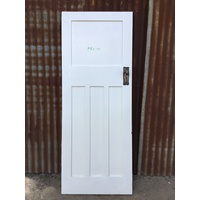

In [ ]:
#Pick the 1st image from the dataset
from PIL import Image
folder = '/content/gdrive/MyDrive/StudioAI/CLIP-SCRIPT/Door/Door/'

idx1 = 5
img1= folder + data.iloc[idx1,0]
Image.open(img1)

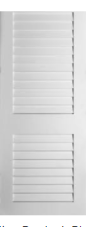

In [ ]:
#Pick the 2nd image from the dataset
idx2 = 262
img2= folder + data.iloc[idx2,0]
Image.open(img2)

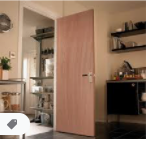

In [ ]:
#Pick the 3rd image from the dataset
idx3 = 202
img3= folder + data.iloc[idx3,0]
Image.open(img3)

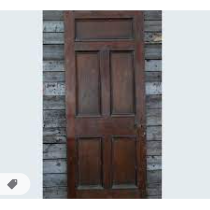

In [ ]:
#Pick the 4th image from the dataset
idx4 =1103
img4= folder + data.iloc[idx4,0]
Image.open(img4)

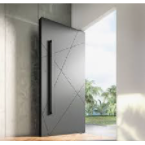

In [ ]:
#Pick the 5th image from the dataset
idx5 = 500
img5= folder + data.iloc[idx5,0]
Image.open(img5)

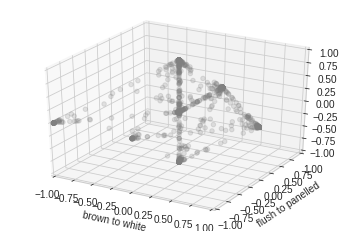

In [ ]:
#plot all the images from the datast in a 3d space where 
#X is a measure of color between brown and white, 
#Y us a measure of the structure of the door between flush to panelled and 
#Z is a measure of the style between old fashioned andmodern

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
ax = plt.axes(projection='3d')
import statistics as st

ax.set_xlim(-1, 1); ax.set_ylim(-1, 1); ax.set_zlim(-1, 1);


plt.xlabel("brown to white")
plt.ylabel("flush to panelled")

cmhot = plt.get_cmap("Paired")

xdata1= [xdata[idx1],xdata[idx2],xdata[idx3],xdata[idx4],xdata[idx5]]
ydata1= [ydata[idx1],ydata[idx2],ydata[idx3],ydata[idx4],ydata[idx5]]
zdata1= [zdata[idx1],zdata[idx2],zdata[idx3],zdata[idx4],zdata[idx5]]



ax.scatter3D(xdata, ydata, zdata, color='grey', alpha=0.2,marker ='o');

cetrx =  st.mean([xdata[idx1],xdata[idx2],xdata[idx3],xdata[idx4],xdata[idx5]])
centry = st.mean([ydata[idx1],ydata[idx2],ydata[idx3],ydata[idx4],ydata[idx5]])
centrz =  st.mean([zdata[idx1],zdata[idx2],zdata[idx3],zdata[idx4],zdata[idx5]])



epsilon = 0.25
inside = []
for i in range(len(xdata)):
  if abs(xdata[i]-cetrx)<epsilon:
    if abs(ydata[i]-centry)<epsilon:
      if abs(zdata[i]-centrz)<epsilon:
        inside.append(i)

#Plot the selected images
#ax.scatter3D(xdata1, ydata1, zdata1,s=50, c="red", marker='s' );

#Find a center between the selected samples and visualize images that are within eplison value from the center
#ax.scatter3D(cetrx, centry, centrz, c="green", marker='^');
#ax.scatter3D(xdata[inside], ydata[inside], zdata[inside], c="green", marker='^');

In [ ]:
distances = {}
import math
for i in range(len(xdata)):
  vector = [(xdata[i]-cetrx),(ydata[i]-centry),(zdata[i]-centrz)]
  distances[i] = math.sqrt((vector[0])**2 + (vector[1])**2 + (vector[2])**2)
dist = list(distances.values())
dist.sort()
closest = dist[:10]
def get_key(val):
    for key, value in distances.items():
         if val == value:
             return key
    return "key doesn't exist"

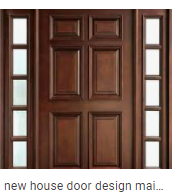

In [ ]:
#Preview image that is the closest to the center of selected images
img8= folder + data.iloc[get_key(closest[0]),0]
Image.open(img8)

In [ ]:
def find_closest(X,Y,Z):
  dist_dict = {}
  import math
  for i in range (len(xdata)):
    vector = [(xdata[i]-X),(ydata[i]-Y),(zdata[i]-Z)]
    dist_dict[i] = math.sqrt((vector[0])**2 + (vector[1])**2 + (vector[2])**2)
  dist = list(dist_dict.values())
  dist.sort()

  def get_key(val):
    for key, value in dist_dict.items():
         if val == value:
             return key
    return "key doesn't exist"

  return data.iloc[get_key(dist[0]),0]



Mini Som

In [ ]:
!pip install minisom

  Created wheel for minisom: filename=MiniSom-2.2.9-cp37-none-any.whl size=8595 sha256=53a2534e58d280cb87d5308cb572159f1c6d39fc9748b2ea78fa78077ef66fd5
  Stored in directory: /root/.cache/pip/wheels/de/a0/08/5234d6b02b29c561f62b6c985e2eb7d480fb0b92359a8c74e4
Successfully built minisom


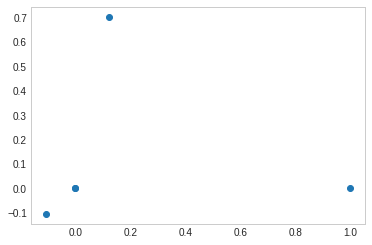

In [ ]:
N_points = len(data)
N_neurons = N_points*2

x = xdata1
y = ydata1
z = zdata1
points = np.array([x,y,z]).T
plt.scatter(x, y)


/usr/local/lib/python3.7/dist-packages/minisom.py:154: UserWarning: Warning: sigma is too high for the dimension of the map.
  warn('Warning: sigma is too high for the dimension of the map.')
/usr/local/lib/python3.7/dist-packages/minisom.py:365: UserWarning: PCA initialization inappropriate:One of the dimensions of the map is 1.
  warn(msg)


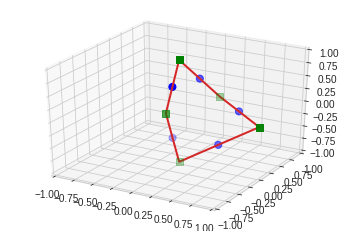

In [ ]:
from minisom import MiniSom


som = MiniSom(1, N_neurons*2, 3, sigma=10,
              neighborhood_function='gaussian', random_seed=50)
max_iter = 200
som.pca_weights_init(points)

paths_x = []
paths_y = []
paths_z = []
for i in np.arange(max_iter):
    i_point = i % len(points)
    som.update(points[i_point], som.winner(points[i_point]), i, max_iter)
    visit_order = np.argsort([som.winner(p)[1] for p in points])
    visit_order = np.concatenate((visit_order, [visit_order[0]]))
    paths_x.append(points[visit_order][:,0])
    paths_y.append(points[visit_order][:,1])
    paths_z.append(points[visit_order][:,2])

ax = plt.axes(projection='3d')
ax.set_xlim(-1, 1); ax.set_ylim(-1, 1); ax.set_zlim(-1, 1);
# Show points correspoding to the selected images
ax.scatter3D(x, y, z,s=50, label='point to visit',c="green", marker='s' );
#Show the best path between the points
ax.plot(paths_x[-1], paths_y[-1],paths_z[-1], 'C3', linewidth=2, label='path')

x_mid = []
y_mid = []
z_mid = []

for i in range(len(paths_x[-1])-1):
  x_mid.append((paths_x[-1][i+1] +  paths_x[-1][i])/2)
  y_mid.append((paths_y[-1][i+1] +  paths_y[-1][i])/2)
  z_mid.append((paths_z[-1][i+1] +  paths_z[-1][i])/2)

#Show the mid points on the path between selested images
ax.scatter3D(x_mid, y_mid, z_mid,s=50,c="blue", marker='o' );

In [ ]:
pts_som = []
for i in range(5):
  x_pick =paths_x[-1][i]
  y_pick =paths_y[-1][i]
  z_pick =paths_z[-1][i]
  x_int = x_mid[i]
  y_int = y_mid[i]
  z_int = z_mid[i]
  pts_som.append([x_pick,y_pick,z_pick])
  pts_som.append([x_int,y_int,z_int])

imgs = []
for i in pts_som:
  imgs.append(folder + find_closest(i[0],i[1],i[2]))
imgs

['/content/gdrive/MyDrive/StudioAI/CLIP-SCRIPT/Door/Door/6448.jpg',
 '/content/gdrive/MyDrive/StudioAI/CLIP-SCRIPT/Door/Door/PanelledDoor (25).png',
 '/content/gdrive/MyDrive/StudioAI/CLIP-SCRIPT/Door/Door/LouveredDoor (158).png',
 '/content/gdrive/MyDrive/StudioAI/CLIP-SCRIPT/Door/Door/ModernDoor (199).png',
 '/content/gdrive/MyDrive/StudioAI/CLIP-SCRIPT/Door/Door/ModernDoor (138).png',
 '/content/gdrive/MyDrive/StudioAI/CLIP-SCRIPT/Door/Door/ModernDoor (160).png',
 '/content/gdrive/MyDrive/StudioAI/CLIP-SCRIPT/Door/Door/FlushDoor (72).png',
 '/content/gdrive/MyDrive/StudioAI/CLIP-SCRIPT/Door/Door/N3979.jpg',
 '/content/gdrive/MyDrive/StudioAI/CLIP-SCRIPT/Door/Door/PanelledDoor (18).png',
 '/content/gdrive/MyDrive/StudioAI/CLIP-SCRIPT/Door/Door/DestroyedDoor (29).png']

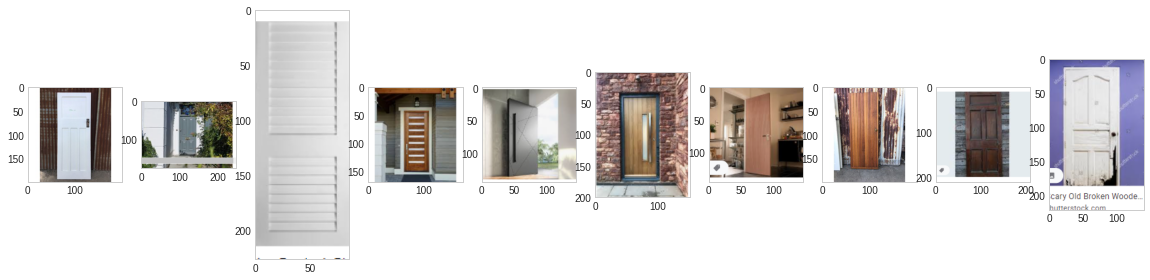

In [ ]:
#Preview the selected and "inbetween" images
import io
from PIL import Image
from PIL.Image import Image as PilImage

import matplotlib.pyplot as plt
from PIL.Image import Image as PilImage
import textwrap, os
plt.rcParams['axes.grid'] = False

def display_images(
    images, 
    columns=6, width=20, height=6, max_images=36, 
    label_wrap_length=50, label_font_size=3):

    height = max(height, int(len(images)/columns) * height)
    plt.figure(figsize=(width, height))
    images = np.array(images)
    images = images.reshape(1 ,10)

    iter= 0
    for i in images:
      for j in i:
        plt.subplot(1, 10, iter + 1)
        plt.imshow(Image.open(j))
        iter = iter+1
display_images( imgs)

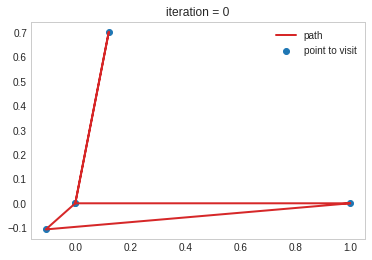

In [ ]:
# Preview of the SOM iterations (in 2d)
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

fig, ax = plt.subplots()
plt.scatter(x, y, label='point to visit')
ln, = plt.plot([], [], 'C3', linewidth=2, label='path')
plt.legend()

def update(frame):
    ln.set_data(paths_x[frame], paths_y[frame])
    plt.title('iteration = %d' % frame)
    return ln,

ani = FuncAnimation(fig, update, frames=np.arange(max_iter),
                    interval=10, repeat=False, blit=False)
HTML(ani.to_html5_video())